In [71]:
# Setup the environment

import numpy as np
import matplotlib . pyplot as plt
from sklearn.datasets import make_circles

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


In [72]:
# Generate data with make_circles

np.random.seed(5)
X, y = make_circles ( n_samples = 500 , factor = 0.3 , noise = 0.1)

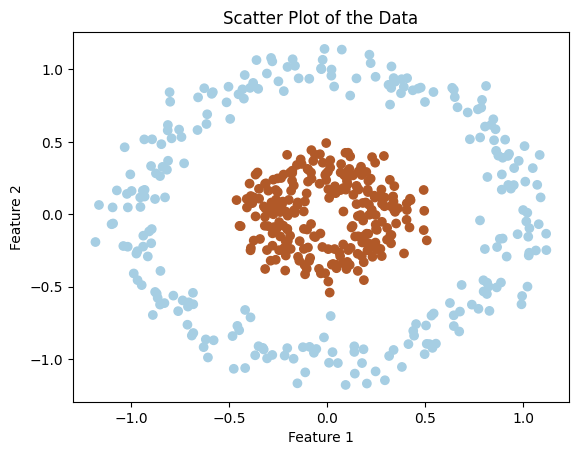

In [73]:
# (5) a)

# Scatter plot of the data
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of the Data')
plt.show()


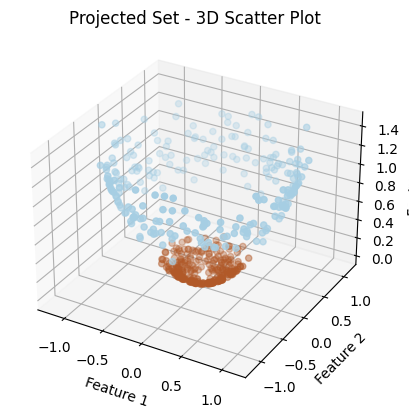

In [74]:
# (5) b)

# Mapping to three-dimensional space
X_projected = np.column_stack((X[:, 0], X[:, 1], X[:, 1]**2 + X[:, 0]**2))

# 3D scatter plot of the projected set
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c = y, cmap = plt.cm.Paired)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Projected Set - 3D Scatter Plot')
plt.show()


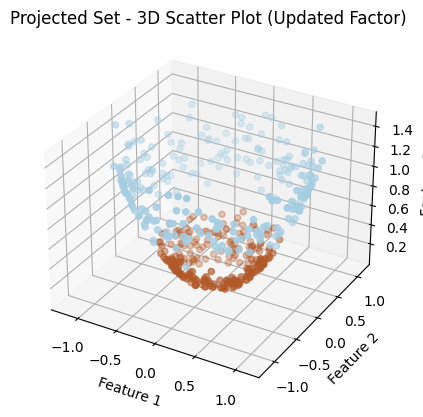

In [75]:
# (5) c)

# Generate data with updated factor value
np.random.seed(5)
X, y = make_circles(n_samples = 500, factor = 0.5, noise = 0.1)

# Mapping to three-dimensional space
X_projected = np.column_stack((X[:, 0], X[:, 1], X[:, 1]**2 + X[:, 0]**2))

# 3D scatter plot of the projected set
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c = y, cmap = plt.cm.Paired)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Projected Set - 3D Scatter Plot (Updated Factor)')
plt.show()


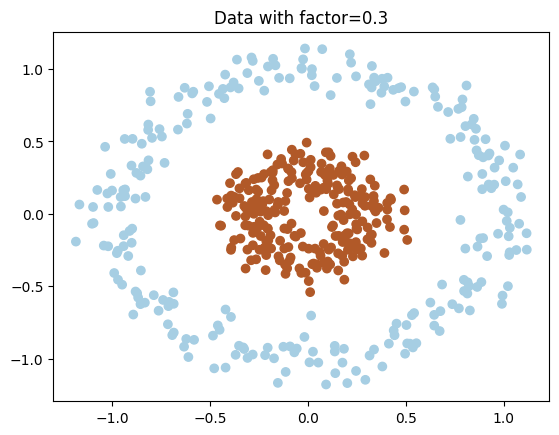

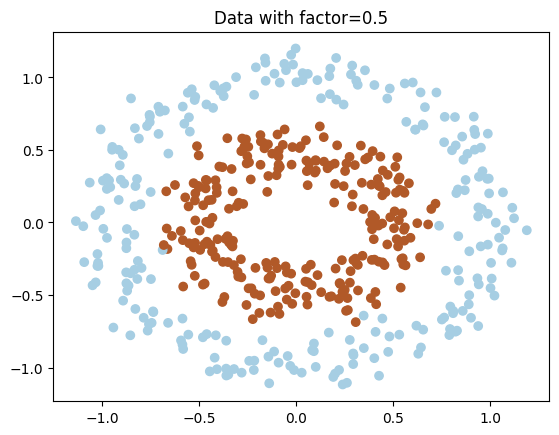

In [76]:
# for comparison

# Generate data with different factors
np.random.seed(5)
factors = [0.3, 0.5]

for factor in factors:
    X, y = make_circles(n_samples = 500, factor = factor, noise = 0.1)
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
    plt.title(f'Data with factor={factor}')
    plt.show()


In [77]:
# (5) d)

# Generate original dataset
np.random.seed(5)
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)

# Split the original dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear SVC with linear kernel
svm = SVC(kernel='linear')

# Train on original dataset
svm.fit(X_train, y_train)
original_accuracy = svm.score(X_test, y_test)
print(f'Accuracy on original dataset: {original_accuracy}')

# Function for mapping from 2D to 3D space as specified in 5b
def mapping_function(X):
    return np.column_stack((X[:, 0], X[:, 1], X[:, 0] ** 2 + X[:, 1] ** 2))

# Transform the dataset to 3D using the mapping function
X_transformed = mapping_function(X)

# Split the transformed dataset into train and test sets
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42)

# Train on transformed dataset
svm.fit(X_train_transformed, y_train_transformed)
transformed_accuracy = svm.score(X_test_transformed, y_test_transformed)
print(f'Accuracy on transformed dataset: {transformed_accuracy}')


Accuracy on original dataset: 0.45
Accuracy on transformed dataset: 1.0


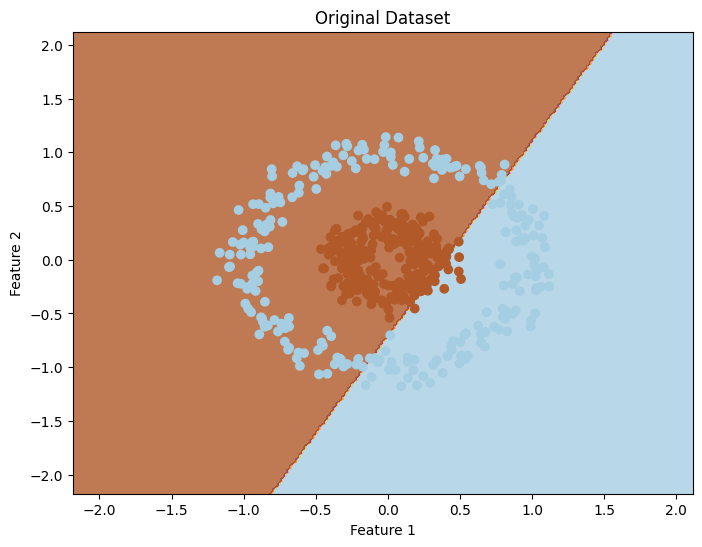

In [86]:
# Generate original dataset
np.random.seed(5)
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)

# Initialize Linear SVC with linear kernel
svm = SVC(kernel='linear')

# Train on original dataset
svm.fit(X, y)

# Create a meshgrid for plotting decision boundary in 2D
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plotting decision boundary for original dataset
plt.figure(figsize=(8, 6))

# Predict and plot decision boundary for original dataset
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Original Dataset')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


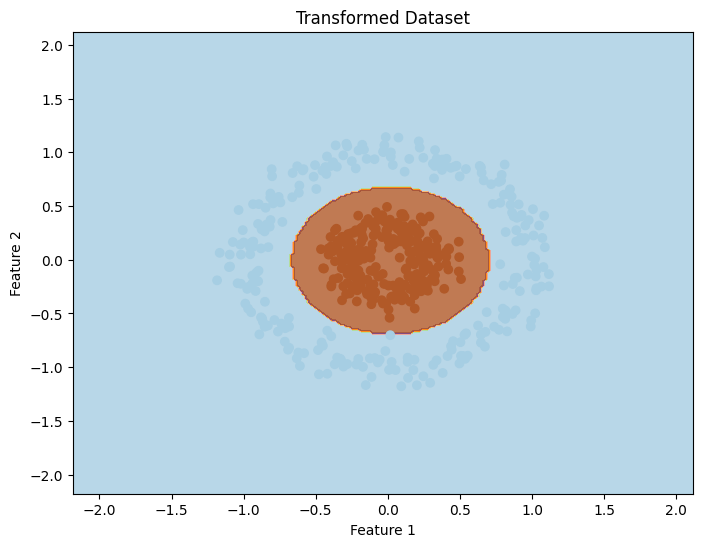

In [80]:
# Function for the specified mapping function
def mapping_function(X):
    return np.column_stack((X[:, 0], X[:, 1], X[:, 0] ** 2 + X[:, 1] ** 2))

# Generate original dataset
np.random.seed(5)
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)

# Transform the dataset using the specified mapping function
X_transformed = mapping_function(X)

# Train on transformed dataset
svm.fit(X_transformed, y)

# Create a meshgrid for plotting decision boundary in 2D
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plotting decision boundary for transformed dataset
plt.figure(figsize=(8, 6))

# Predict and plot decision boundary for transformed dataset
Z = svm.predict(mapping_function(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points from original dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Transformed Dataset')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
